In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [ ]:
#Loading dataframe

df_regional_analysis = pd.read_excel('/content/df_startup_data_v1.xlsx')

In [5]:
# Loading the data file of equatity analysis
equity_df = pd.read_excel('/content/df_startup_equity.xlsx')
equity_df

,id,Funding_State,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,FS_Angel,FS_Crowd,...,RM_Subscription,PATENTS_COUNT,AWARDS_COUNT,INCUBATIONS/ACCELERATIONS_COUNT,capital,Legal_Type_Code,kind_of_shares_Code,Date_seconds,kmeans_cluster,agg_cluster
0,10,0,1,1,0,0,0,0,0,0,...,0,1,0,2,0.001774,2,2,1637280000,0,1
1,100,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0.000333,2,2,1572912000,0,1
2,101,0,1,0,0,0,0,0,0,0,...,1,0,3,1,0.000049,2,2,1630108800,0,1
3,102,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0.002883,3,1,1393200000,1,2
4,103,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0.000665,2,2,1419206400,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,93,2,1,0,0,0,0,0,1,0,...,1,0,0,0,0.011087,2,2,1580774400,0,1
303,94,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0.006652,2,2,1496707200,1,2
304,96,2,1,0,0,0,0,0,0,0,...,0,0,1,0,0.022174,3,1,1421712000,1,2
305,98,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0.000554,2,2,1598400000,0,1


In [6]:
#Merging Dataframe
region_equity = df_regional_analysis.merge(equity_df[['id','kmeans_cluster']], how = 'left', on='id')

#Replace equity cluster values
mapping_dict = {0.0: 1, 1.0: 2, 2.0: 3}
region_equity['kmeans_cluster'] = region_equity['kmeans_cluster'].replace(mapping_dict)
region_equity['kmeans_cluster'].fillna(0, inplace=True)
region_equity['kmeans_cluster'] = region_equity['kmeans_cluster'].astype(int)
#region_equity['kmeans_cluster'] = region_equity['kmeans_cluster'].astype(int)
region_equity = region_equity.rename(columns={'kmeans_cluster': 'Equity_Clusters'})

In [7]:
region_equity

,id,Unnamed:_0.1,Unnamed:_0_x,Corporate_Name_x,Region,INDUSTRIES,TECHNOLOGY,BUSINESS_MODEL,REVENUE_MODEL,FUNDING_SOURCES,...,type,PATENTS_COUNT,AWARDS_COUNT,INCUBATIONS/ACCELERATIONS_COUNT,Date_Started_new,capital,Legal_Type_Code,kind_of_shares_Code,New_Region,Equity_Clusters
0,1,0,0,[i2.d] technologies,halandri,['Enterprise Software'],['Cloud Computing'],"['B2B', 'B2B2C']","['Commission Fee', 'SaaS', 'Subscription']",['VC'],...,['None'],0,2,3,NaT,NaN,NaN,NaN,Attica,0
1,10,1,1,A.D.W.K. ADWORK,zografou,['Advertising & Marketing (AdTech)'],"['AI', 'AR/VR', 'Data Analytics - Big Data', '...","['B2B', 'B2B2C']","['Price per Item', 'SaaS']",['Self'],...,['None'],1,0,2,2021-11-19,16000.0,2.0,2.0,Attica,1
2,100,2,2,ENEXAN P.C.,tripolis,"['Environment & Energy (GreenTech, CleanTech)']","['AI', 'Cleantech', 'Software', 'Web or Mobile...","['B2B', 'B2B2C']","['Commission Fee', 'Licencing', 'Subscription']",['Self'],...,['None'],0,0,0,2019-11-05,3000.0,2.0,2.0,Peloponnese,1
3,101,3,3,ENFORGE PC,athens,['Manufacturing'],"['AI', 'Data Analytics - Big Data', 'Other', '...",['B2B'],"['SaaS', 'Subscription']","['Grant', 'Self']",...,['None'],0,3,1,2021-08-28,438.0,2.0,2.0,Attica,1
4,102,4,4,Engineers For Business S.A.,thessaloniki,['AgriTech / FoodTech'],"['Blockchain', 'Cloud Computing', 'Drones', 'I...",['B2B'],"['Other', 'Price per Item', 'SaaS', 'Subscript...","['Grant', 'Other', 'Self']",...,['None'],0,0,0,2014-02-24,26000.0,3.0,1.0,Central Macedonia,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,599,599,BUTLAIR Electronic Communication and Advertisi...,athens,['Advertising & Marketing (AdTech)'],"['Software', 'Web or Mobile Application']","['B2B2C', 'B2C']","['Price per Use', 'Subscription']",['Self'],...,['None'],0,1,1,NaT,NaN,NaN,NaN,Attica,0
600,96,600,600,BUY THE MILE SA,piraeus,['InsurTech - Insurance'],"['Data Analytics - Big Data', 'IoT', 'Sensors'...",['B2B'],"['Commission Fee', 'Licencing', 'Price per Use']",['Other'],...,"['Pre Seed', ' Other']",0,1,0,2015-01-20,200000.0,3.0,1.0,Attica,2
601,97,601,601,Campsaround,athens,['Travel / Hospitality / Leisure'],"['IoT', 'Software', 'Web or Mobile Application']",['B2B2C'],"['Commission Fee', 'Marketplace/Brokerage', 'S...","['Angel', 'Grant', 'Loan', 'Self']",...,"['Pre Seed', ' Angel']",0,2,2,NaT,NaN,NaN,NaN,Attica,0
602,98,602,602,CAPTAIN COACH P.C.,thessaloniki,"['Life Sciences (MedTech, HealthTech, BioTech)']","['AI', 'AR/VR', 'Hardware', 'IoT', 'Sensors']",['B2B2C'],"['Licencing', 'Price per Use']","['Grant', 'Self']",...,"['Pre Seed', ' Grant']",0,1,1,2020-08-26,5000.0,2.0,2.0,Central Macedonia,1


In [8]:
training_region_equity = region_equity.drop(['Unnamed:_0.1',
                                    'Unnamed:_0_x',
                                    'Corporate_Name_x',
                                    'INDUSTRIES',
                                    'TECHNOLOGY',
                                    'BUSINESS_MODEL',
                                    'REVENUE_MODEL',
                                    'FUNDING_SOURCES',
                                    'ONE_LINER',
                                    'About',
                                    'Solution_&_Product',
                                    'Innovation_&_Scalability',
                                    'Traction_&_achievements',
                                    'Team_&_Why_Us',
                                    'Funding_Needs',
                                    'FUNDING',
                                    'PATENTS',
                                    'AWARDS',
                                    'INCUBATIONS/ACCELERATIONS',
                                    'Funding_State',
                                    'region_population',
                                    'Unnamed:_0_y',
                                    'Corporate_Name_y',
                                    'Commercial_Titles',
                                    'Date_Started',
                                    'Legal_Type',
                                    'Address',
                                    'Website',
                                    'kind_of_shares',
                                    'no_of_shares',
                                    'value_of_share',
                                    'BUSINESS_MODEL_updated',
                                    'FUNDING_SOURCES_updated',
                                    'REVENUE_MODEL_updated',
                                    'INDUSTRIES_updated',
                                    'TECHNOLOGY_updated',
                                    'PATENTS_COUNT',
                                    'AWARDS_COUNT',
                                    'INCUBATIONS/ACCELERATIONS_COUNT',
                                    'Date_Started_new',
                                    'capital',
                                    'Legal_Type_Code',
                                    'kind_of_shares_Code',
                                    'Region',
                                    'gemi_id',
                                    'FUNDING',
                                    'FUNDING_SOURCES',
                                    'FS_Angel',
                                    'FS_Crowd',
                                    'FS_Grant',
                                    'FS_Loan',
                                    'FS_Other',
                                    'FS_Self',
                                    'FS_VC',
                                    'FUNDING_SOURCES_updated',
                                    'Funding_Needs',
                                    'Funding_State',
                                    'RM_Advertising',
                                    'RM_Commission Fee',
                                    'RM_Licencing',
                                    'RM_Marketplace/Brokerage',
                                    'RM_Other',
                                    'RM_Price per Item',
                                    'RM_Price per Use',
                                    'RM_SaaS',
                                    'RM_Subscription',
                                    'title','amount','year','type'], axis=1)

In [9]:
training_region_equity

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Nanotech,TECH_Networks,TECH_Other,TECH_Quantum Computing,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,New_Region,Equity_Clusters
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Attica,0
1,10,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,Attica,1
2,100,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,Peloponnese,1
3,101,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,Attica,1
4,102,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,Central Macedonia,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,Attica,0
600,96,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Attica,2
601,97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,Attica,0
602,98,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Central Macedonia,1


In [10]:
loc_coordinate = {'Attica': [38.0458, 23.8585], 
                  'Central Greece':	[38.6044, 22.7152],
                  'Central Macedonia':	[40.6212, 23.1918], 'Region of Crete':	[35.2401, 24.8093],
                  'Eastern Macedonia and Thrace':	[41.1295, 24.8877],
                  'Epirus':	[39.5706, 20.7643],
                  'Ionian Islands':	[38.249, 20.6247],
                  'Northern Aegean':	[38.42, 26.03],
                  'Peloponnese':	[37.5079, 22.3735],
                  'South Aegean':	[37.0855, 25.1489],
                  'Thessaly':	[39.4022, 21.9836],
                  'Western Greece':	[38.5115, 21.5707],
                  'Western Macedonia':	[40.3004, 21.7904]
                  }

In [11]:
#training_region_equity

In [12]:
training_region_equity['Latitude'] = training_region_equity['New_Region'].map(lambda x: loc_coordinate[x][0])
training_region_equity['Longitude'] = training_region_equity['New_Region'].map(lambda x: loc_coordinate[x][1])

In [13]:
training_region_equity

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Other,TECH_Quantum Computing,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,New_Region,Equity_Clusters,Latitude,Longitude
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Attica,0,38.0458,23.8585
1,10,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,Attica,1,38.0458,23.8585
2,100,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,Peloponnese,1,37.5079,22.3735
3,101,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,Attica,1,38.0458,23.8585
4,102,1,0,0,0,0,0,0,1,0,...,0,0,1,1,1,1,Central Macedonia,2,40.6212,23.1918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,1,Attica,0,38.0458,23.8585
600,96,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,Attica,2,38.0458,23.8585
601,97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,Attica,0,38.0458,23.8585
602,98,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,Central Macedonia,1,40.6212,23.1918


In [14]:
training_region_equity['Region_Code'] = pd.factorize(training_region_equity['New_Region'])[0] + 1

In [15]:
training_region_equity

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Quantum Computing,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,New_Region,Equity_Clusters,Latitude,Longitude,Region_Code
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,Attica,0,38.0458,23.8585,1
1,10,1,1,0,0,0,0,1,0,0,...,0,0,0,1,1,Attica,1,38.0458,23.8585,1
2,100,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,Peloponnese,1,37.5079,22.3735,2
3,101,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,Attica,1,38.0458,23.8585,1
4,102,1,0,0,0,0,0,0,1,0,...,0,1,1,1,1,Central Macedonia,2,40.6212,23.1918,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,0,1,1,Attica,0,38.0458,23.8585,1
600,96,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,Attica,2,38.0458,23.8585,1
601,97,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,Attica,0,38.0458,23.8585,1
602,98,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,Central Macedonia,1,40.6212,23.1918,3


In [16]:
training_region_equity_final = training_region_equity.drop(['New_Region', 'Latitude', 'Longitude'], axis=1)

In [17]:
training_region_equity_final

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Nanotech,TECH_Networks,TECH_Other,TECH_Quantum Computing,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,Equity_Clusters,Region_Code
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,100,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2
3,101,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,1,1
4,102,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
600,96,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2,1
601,97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
602,98,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 [19078111.09933775]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 [19078111.09933775, 4737242.082636111]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 [19078111.09933775, 4737242.082636111, 2119132.6480850815]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332, 760523.4522939689]
6 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332, 760523.4522939689, 536946.8632811573]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332, 760523.4522939689, 536946.8632811573, 387195.3552287193]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332, 760523.4522939689, 536946.8632811573, 387195.3552287193, 301348.6567850221]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 [19078111.09933775, 4737242.082636111, 2119132.6480850815, 1200732.3116221332, 760523.4522939689, 536946.8632811573, 387195.3552287193, 301348.6567850221, 238177.7206702247]


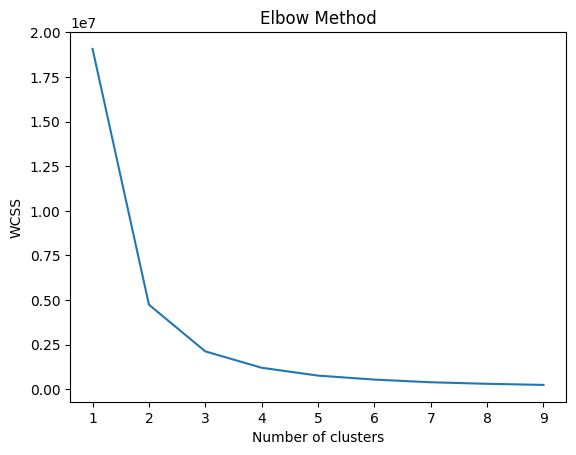

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i,random_state=10)
    kmeans.fit(training_region_equity_final)
    wcss.append(kmeans.inertia_) 
    print(i,wcss) 
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=10)
target = kmeans.fit_predict(training_region_equity_final)
training_region_equity['Region_Clusters'] = target
training_region_equity_final['Region_Clusters'] = target

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
training_region_equity

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,New_Region,Equity_Clusters,Latitude,Longitude,Region_Code,Region_Clusters
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Attica,0,38.0458,23.8585,1,0
1,10,1,1,0,0,0,0,1,0,0,...,0,0,1,1,Attica,1,38.0458,23.8585,1,0
2,100,1,1,0,0,0,0,0,0,0,...,0,0,1,1,Peloponnese,1,37.5079,22.3735,2,0
3,101,1,0,0,0,0,0,0,0,0,...,0,0,1,1,Attica,1,38.0458,23.8585,1,0
4,102,1,0,0,0,0,0,0,1,0,...,1,1,1,1,Central Macedonia,2,40.6212,23.1918,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,1,1,Attica,0,38.0458,23.8585,1,0
600,96,1,0,0,0,0,0,0,0,0,...,0,1,1,0,Attica,2,38.0458,23.8585,1,0
601,97,0,1,0,0,0,0,0,0,0,...,0,0,1,1,Attica,0,38.0458,23.8585,1,0
602,98,0,1,0,0,0,0,0,0,0,...,0,1,0,0,Central Macedonia,1,40.6212,23.1918,3,0


In [21]:
training_region_equity_final

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Networks,TECH_Other,TECH_Quantum Computing,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,Equity_Clusters,Region_Code,Region_Clusters
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,10,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,1,0
2,100,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2,0
3,101,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,0
4,102,1,0,0,0,0,0,0,1,0,...,0,0,0,1,1,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
600,96,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,2,1,0
601,97,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
602,98,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,3,0


In [22]:
import seaborn as sns
# Some functions to plot just the variables that has significant deviation from global mean
def outside_limit(df, label_col, label, sensitivity):
  feature_list = training_region_equity_final.columns
  
  plot_list = []
  mean_overall_list = []
  mean_cluster_list = []
  
  for i,varname in enumerate(feature_list):
    
    #     get overall mean for a variable, set lower and upper limit
    mean_overall = df[varname].mean()
    lower_limit = mean_overall - (mean_overall*sensitivity)
    upper_limit = mean_overall + (mean_overall*sensitivity)

    #     get cluster mean for a variable
    cluster_filter = df[label_col]==label
    pd_cluster = df[cluster_filter]
    mean_cluster = pd_cluster[varname].mean()
    
    #     create filter to display graph with 0.5 deviation from the mean
    if mean_cluster <= lower_limit or mean_cluster >= upper_limit:
      plot_list.append(varname)
      mean_overall_std = mean_overall/mean_overall
      mean_cluster_std = mean_cluster/mean_overall
      mean_overall_list.append(mean_overall_std)
      mean_cluster_list.append(mean_cluster_std)
   
  mean_df = pd.DataFrame({'feature_list':plot_list,
                         'mean_overall_list':mean_overall_list,
                         'mean_cluster_list':mean_cluster_list})
  mean_df = mean_df.sort_values(by=['mean_cluster_list'], ascending=False)
  
  return mean_df

def plot_barchart_all_unique_features(df, label_col, label, ax, sensitivity):
  
  mean_df = outside_limit(df, label_col, label, sensitivity)
  mean_df_to_plot = mean_df.drop(['mean_overall_list'], axis=1)
  
  if len(mean_df.index) != 0:
    sns.barplot(y='feature_list', x='mean_cluster_list', data=mean_df_to_plot, palette=sns.cubehelix_palette(20, start=.5, rot=-.75, reverse=True), \
                alpha=0.75, dodge=True, ax=ax)

    for i,p in enumerate(ax.patches):
      ax.annotate("{:.02f}".format((p.get_width())), 
                  (1, p.get_y() + p.get_height() / 2.), xycoords=('axes fraction', 'data'),
                  ha='right', va='top', fontsize=10, color='black', rotation=0, 
                  xytext=(0, 0),
                  textcoords='offset pixels')
  
  ax.set_title('Unique Characteristics of Cluster ' + str(label))
  ax.set_xlabel('Standardized Mean')
  ax.axvline(x=1, color='k')

def plot_features_all_cluster(df, label_col, n_clusters, sensitivity):
  n_plot = n_clusters
  fig, ax = plt.subplots(n_plot, 1, figsize=(12, n_plot*6), sharex='col')
  ax= ax.ravel()
  
  label = np.arange(n_clusters)
  for i in label:
    plot_barchart_all_unique_features(df, label_col, label=i, ax=ax[i], sensitivity=sensitivity)
    ax[i].xaxis.set_tick_params(labelbottom=True)
    
  plt.tight_layout()
  display(fig)

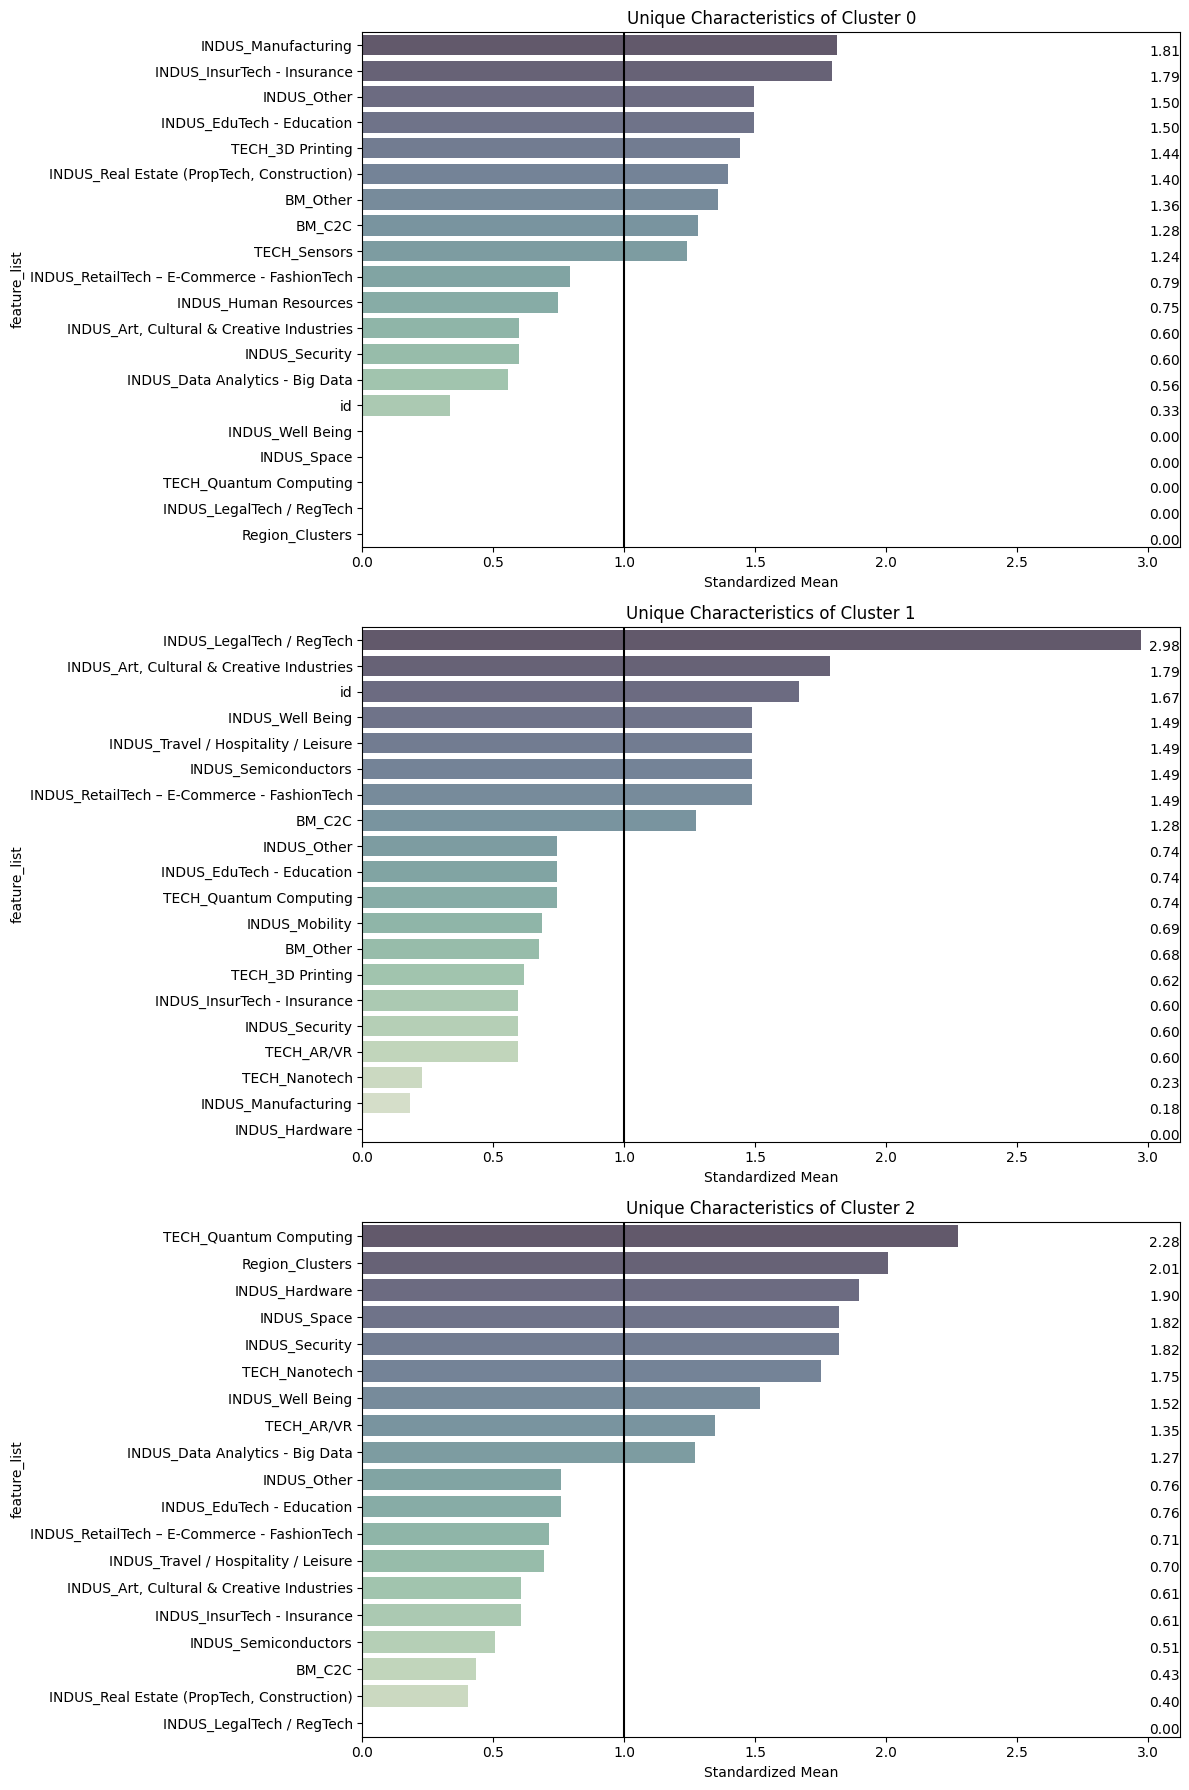

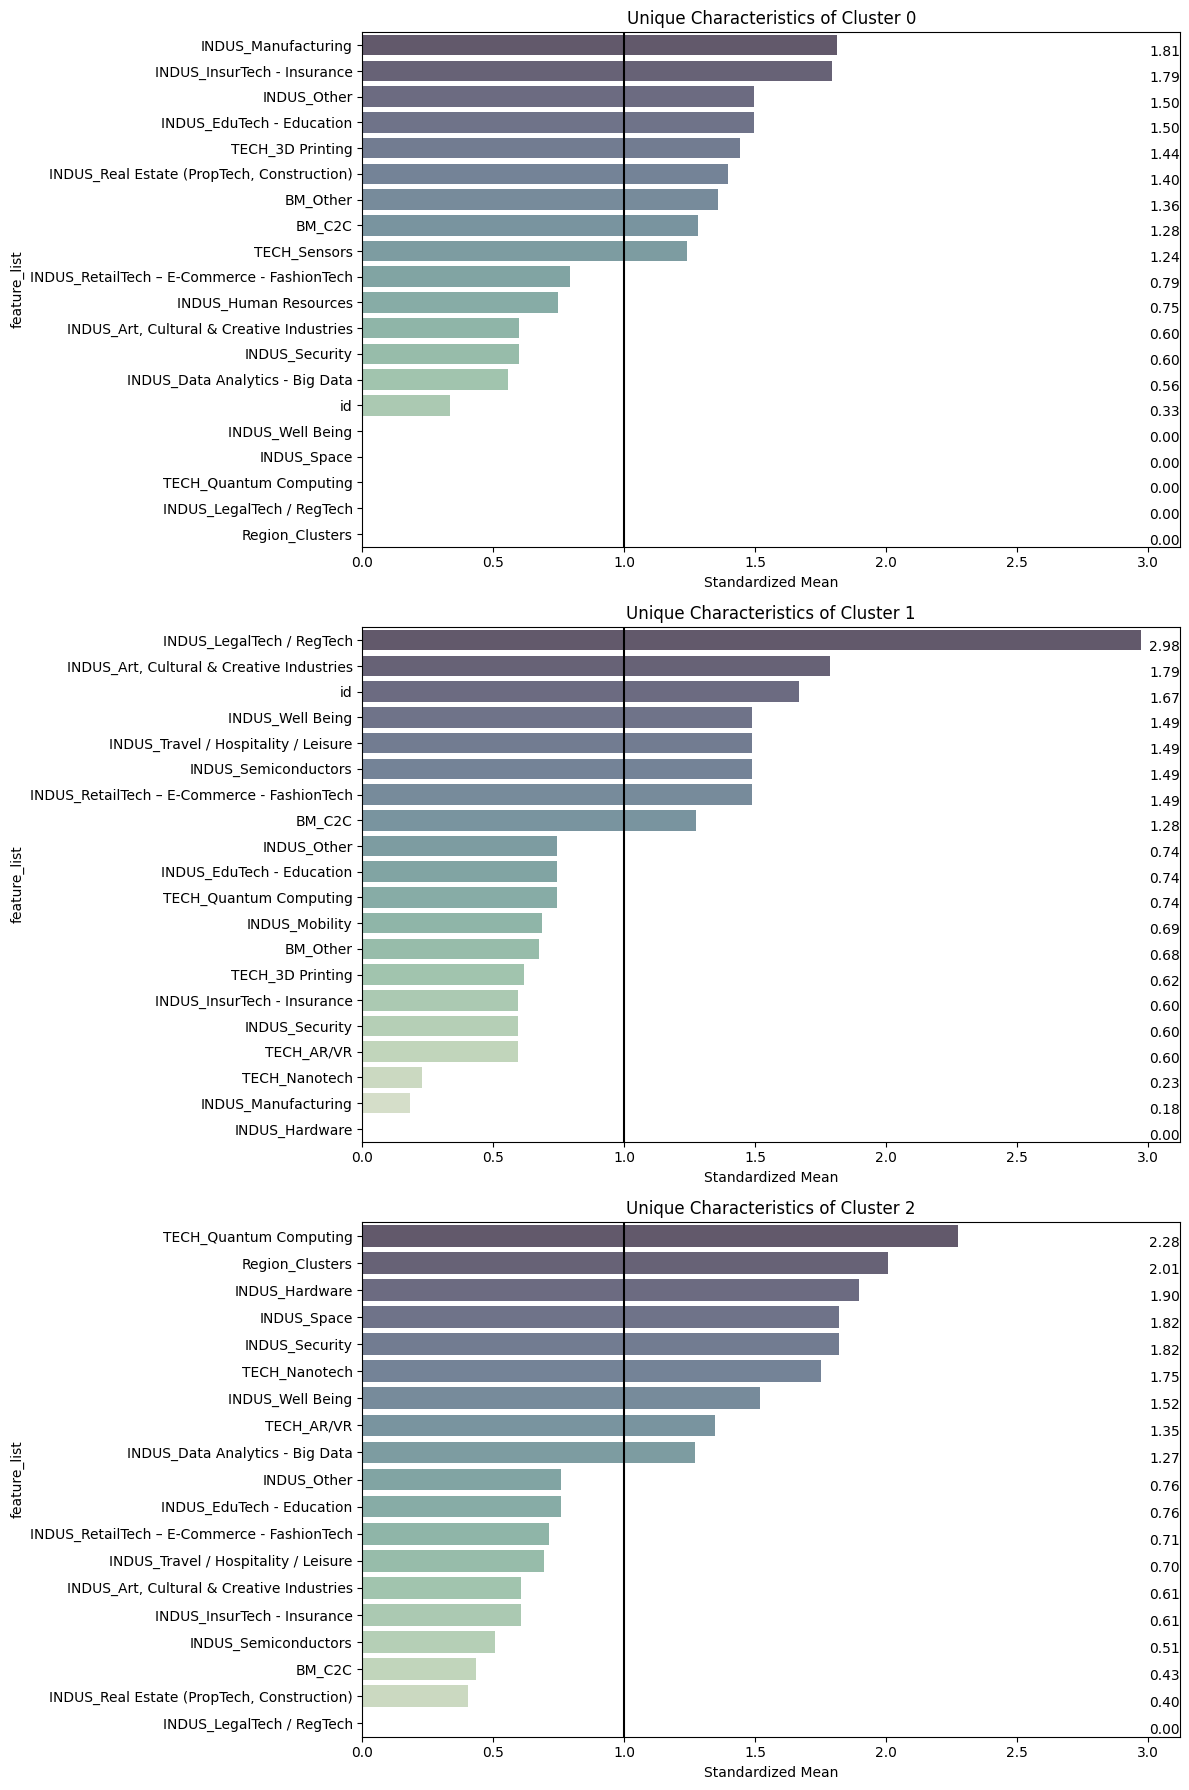

In [23]:
plot_features_all_cluster(df=training_region_equity_final, label_col='Region_Clusters', n_clusters=3, sensitivity=0.2)

In [24]:
# For Power BI, extracting the final dataframe for visualization
training_region_equity.to_excel("Cluster_Final.xlsx", index=False)

In [25]:
training_region_equity

,id,BM_B2B,BM_B2B2C,BM_B2C,BM_B2G,BM_C2C,BM_Other,INDUS_Advertising & Marketing (AdTech),INDUS_AgriTech / FoodTech,"INDUS_Art, Cultural & Creative Industries",...,TECH_Robotics,TECH_Sensors,TECH_Software,TECH_Web or Mobile Application,New_Region,Equity_Clusters,Latitude,Longitude,Region_Code,Region_Clusters
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,Attica,0,38.0458,23.8585,1,0
1,10,1,1,0,0,0,0,1,0,0,...,0,0,1,1,Attica,1,38.0458,23.8585,1,0
2,100,1,1,0,0,0,0,0,0,0,...,0,0,1,1,Peloponnese,1,37.5079,22.3735,2,0
3,101,1,0,0,0,0,0,0,0,0,...,0,0,1,1,Attica,1,38.0458,23.8585,1,0
4,102,1,0,0,0,0,0,0,1,0,...,1,1,1,1,Central Macedonia,2,40.6212,23.1918,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,95,0,1,1,0,0,0,1,0,0,...,0,0,1,1,Attica,0,38.0458,23.8585,1,0
600,96,1,0,0,0,0,0,0,0,0,...,0,1,1,0,Attica,2,38.0458,23.8585,1,0
601,97,0,1,0,0,0,0,0,0,0,...,0,0,1,1,Attica,0,38.0458,23.8585,1,0
602,98,0,1,0,0,0,0,0,0,0,...,0,1,0,0,Central Macedonia,1,40.6212,23.1918,3,0
